In [2]:
pip install pandas geopandas matplotlib

  Using cached geopandas-1.1.0-py3-none-any.whl.metadata (2.3 kB)
  Using cached pyogrio-0.11.0-cp312-cp312-macosx_12_0_x86_64.whl.metadata (5.3 kB)
  Using cached pyproj-3.7.1-cp312-cp312-macosx_13_0_x86_64.whl.metadata (31 kB)
  Using cached shapely-2.1.1-cp312-cp312-macosx_10_13_x86_64.whl.metadata (6.8 kB)
Using cached geopandas-1.1.0-py3-none-any.whl (338 kB)
Using cached pyogrio-0.11.0-cp312-cp312-macosx_12_0_x86_64.whl (20.7 MB)
Using cached pyproj-3.7.1-cp312-cp312-macosx_13_0_x86_64.whl (6.3 MB)
Using cached shapely-2.1.1-cp312-cp312-macosx_10_13_x86_64.whl (1.8 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4/4 [geopandas]/4 [geopandas]
Note: you may need to restart the kernel to use updated packages.


In [19]:

import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
df = pd.read_csv("recall_data.csv")

              STATE_NAME  COUNT
0                Alabama     49
1                 Alaska     58
2                Alberta      2
3                Arizona    271
4               Arkansas     82
5       British Columbia      6
6             California   4320
7               Colorado    309
8            Connecticut    174
9               Delaware     31
10  District of Columbia      8
12               Florida   1527
13               Georgia    753
14                Hawaii     75
15                 Idaho    221
16              Illinois   1908
17               Indiana    537
18                  Iowa    399
19                Kansas    323
20              Kentucky    194
21             Louisiana     71
22                 Maine     95
23              Maryland    763
24         Massachusetts   1000
25              Michigan   1551
26             Minnesota    849
27           Mississippi     43
28              Missouri    352
29               Montana     21
30              Nebraska     90
31      

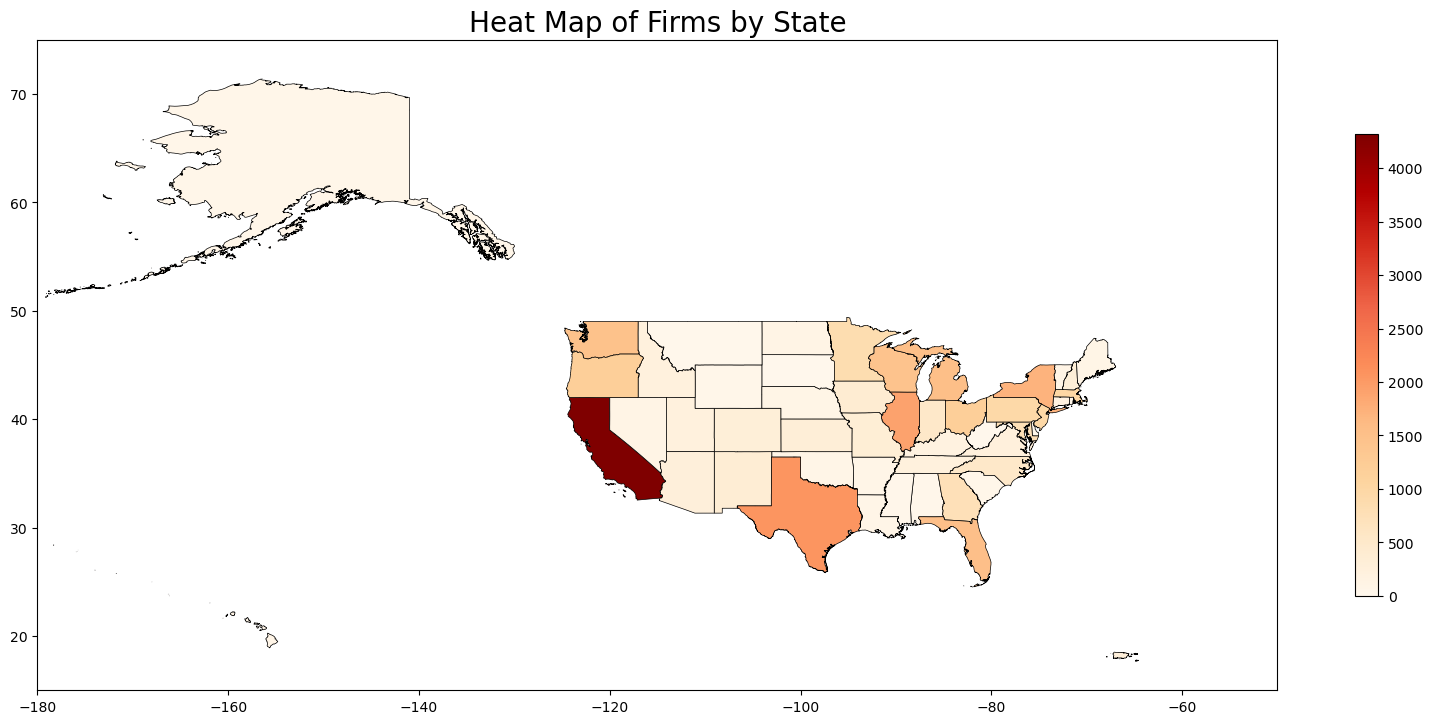

In [66]:

row_count = len(df)
us_states = gpd.read_file('cb_2024_us_state_500k/cb_2024_us_state_500k.shp')

state_counts = df.groupby('FIRMSTATEPRVNCNAM').size().reset_index(name='COUNT')

state_counts = state_counts[state_counts['FIRMSTATEPRVNCNAM'] != 'FIRMSTATEPRVNCNAM']
state_counts.columns = ['STATE_NAME', 'COUNT']
print(state_counts)

merged = us_states.merge(state_counts, left_on='NAME', right_on='STATE_NAME', how='left')
merged['COUNT'] = merged['COUNT'].fillna(0)

# Create a larger plot
fig, ax = plt.subplots(1, 1, figsize=(20, 20))  # Increased from (15, 10)

merged.plot(
    column='COUNT',
    ax=ax,
    legend=True,
    legend_kwds={'shrink': 0.3},
    cmap='OrRd',       # Choose color map
    edgecolor='black',
    linewidth=0.5
)
ax.set_xlim(-180, -50)
ax.set_ylim(15, 75)

ax.set_title('Heat Map of Firms by State', fontsize=20)
ax.axis('on')  # Hides axes

plt.show()


